In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train = x_train/255
x_test  = x_test/255

In [7]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#model.fit(x_train,y_train,epochs=10)

In [9]:
y_predict = model.predict(x_test)

In [10]:
y_predict_lbl = [np.argmax(i) for i in y_predict]

In [11]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_lbl)

In [12]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  5,  15, 255, 510,  52, 109,  18,  11,   0,   5],
       [  0,  17, 264, 612, 231,   4,   0,   2,   5,   0],
       [  4,  12, 380, 423, 147,  13,   4,  40,   1,   8],
       [  2,   6, 146, 588, 119,  54,   1,  94,   0,   0],
       [  3,   7, 419, 324, 207,   4,   4,   9,   0,   5],
       [  1,   8, 111, 549, 145,  15,   1,  58,   1,   3],
       [  6,  13, 237, 183, 478,   1,   1,  31,   3,   5],
       [  9,  24, 273, 531, 163,   5,   4,  15,   0,   4],
       [  0,  10, 375, 371, 198,   3,   0,  15,   0,   2],
       [  4,   5, 256, 495, 235,   1,   0,   9,   2,   2]])>

Text(69.0, 0.5, 'truth')

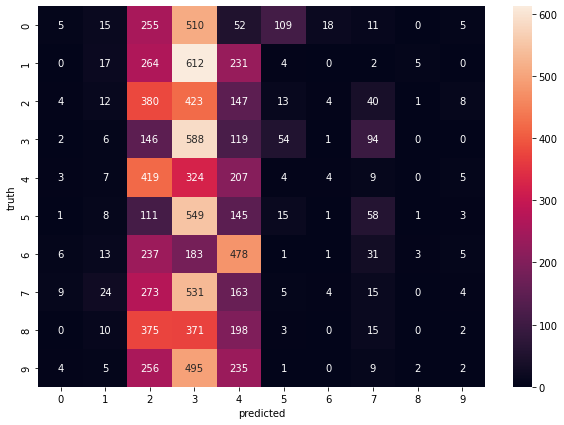

In [13]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth")